# AlexNet

In [1]:
from tensorflow import keras
import numpy as np
import tensorflow as tf

from d2l.tensorflow import config, data, plot

config.setup('CPU')

Tensorflow running on CPU


In [3]:
alexnet = keras.models.Sequential()

alexnet.add(keras.layers.Conv2D(
    filters=96, kernel_size=11, strides=4, input_shape=(224, 224, 1), padding='same', activation='relu'
))
alexnet.add(keras.layers.MaxPool2D(pool_size=3, strides=2))

alexnet.add(keras.layers.Conv2D(filters=256, kernel_size=5, strides=2, padding='same', activation='relu'))
alexnet.add(keras.layers.MaxPool2D(pool_size=3, strides=2))

alexnet.add(keras.layers.Conv2D(filters=384, kernel_size=3, strides=1, padding='same', activation='relu'))
alexnet.add(keras.layers.Conv2D(filters=384, kernel_size=3, strides=1, padding='same', activation='relu'))
alexnet.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
alexnet.add(keras.layers.MaxPool2D(pool_size=3, strides=2))

alexnet.add(keras.layers.Flatten())

alexnet.add(keras.layers.Dense(units=4096, activation='relu'))
alexnet.add(keras.layers.Dropout(rate=0.5))
alexnet.add(keras.layers.Dense(units=4096, activation='relu'))
alexnet.add(keras.layers.Dropout(rate=0.5))
alexnet.add(keras.layers.Dense(units=10, activation='softmax'))

In [4]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 96)        11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 256)         8

In [5]:
X = np.random.uniform(size=(1, 224, 224, 1)).astype(np.float32)

for layer in alexnet.layers:
    X = layer(X)
    print('{} output shape: {}'.format(layer.name, X.shape))

conv2d output shape: (1, 56, 56, 96)
max_pooling2d output shape: (1, 27, 27, 96)
conv2d_1 output shape: (1, 14, 14, 256)
max_pooling2d_1 output shape: (1, 6, 6, 256)
conv2d_2 output shape: (1, 6, 6, 384)
conv2d_3 output shape: (1, 6, 6, 384)
conv2d_4 output shape: (1, 6, 6, 256)
max_pooling2d_2 output shape: (1, 2, 2, 256)
flatten output shape: (1, 1024)
dense output shape: (1, 4096)
dropout output shape: (1, 4096)
dense_1 output shape: (1, 4096)
dropout_1 output shape: (1, 4096)
dense_2 output shape: (1, 10)


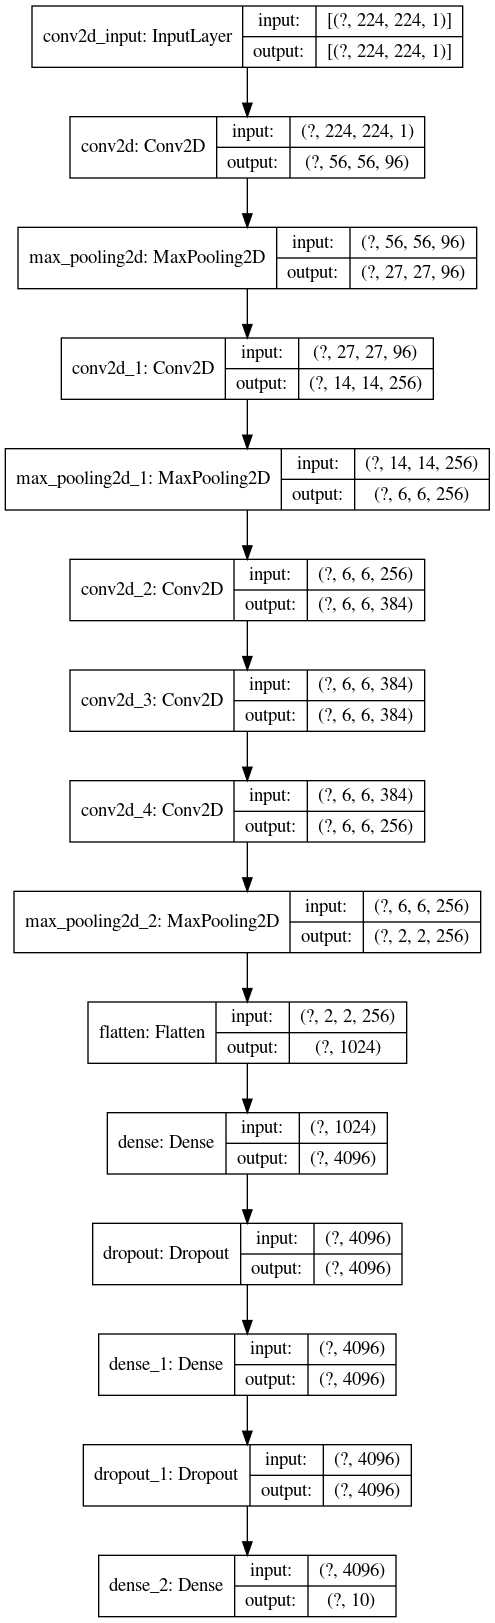

In [6]:
keras.utils.plot_model(alexnet, show_shapes=True, to_file='alexnet.png')

## Training

In [7]:
def resize_images_generator(X, y, batch_size, shape):
    size = len(X)
    epochs = len(X) // batch_size + 1

    while True:
        for e in range(epochs):
            images = X[e * batch_size: (e + 1) * batch_size]
            labels = y[e * batch_size: (e + 1) * batch_size]
            yield tf.image.resize(images, shape), labels

In [8]:
batch_size = 256
epochs = 5
learning_rate = 0.03

optmizer = keras.optimizers.SGD(learning_rate=learning_rate)
loss = keras.losses.CategoricalCrossentropy()
metric = keras.metrics.CategoricalAccuracy()

alexnet.compile(optimizer=optmizer, loss=loss, metrics=metric)

In [ ]:
X_train, y_train, X_test, y_test = data.load_fashion_mnist_keras()

In [9]:
train_iter = resize_images_generator(X_train, y_train, batch_size, [224, 224])
test_iter = resize_images_generator(X_test, y_test, batch_size, [224, 224])

train_steps = len(X_train) // batch_size + 1
val_steps = len(X_test) // batch_size + 1

In [10]:
# hist = alexnet.fit(train_iter, epochs=epochs, validation_data=test_iter, steps_per_epoch=train_steps, validation_steps=val_steps)

In [11]:
# plot.plot_history(hist, 'categorical_accuracy')